IMPORT DAS BIBLIOTECAS NECESSÁRIAS

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Carregando Dataset
dfpath = "D:\\FACULDADE\\SEGUNDO SEMESTRE\\ALGEBRA LINEAR\\PCA\\PCA_DATASET.csv"
df = pd.read_csv(dfpath)
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Rating          7729 non-null   int64
 1   Reviews         7729 non-null   int64
 2   Size            7729 non-null   int64
 3   Installs        7729 non-null   int64
 4   Price           7729 non-null   int64
 5   Content Rating  7729 non-null   int64
 6   Is_Paid         7729 non-null   int64
dtypes: int64(7)
memory usage: 422.8 KB


NORMALIZAÇÃO E APLICAÇÃO DO PCA

In [3]:
# Normalização os dados (StandardScaler)
scaler = MinMaxScaler()
D = scaler.fit_transform(df)
D = pd.DataFrame(D)
D

,0,1,2,3,4,5,6
0,0.75,3.519410e-06,0.19,9.999000e-06,0.0,0.055556,0.0
1,0.50,2.151741e-05,0.14,4.999990e-04,0.0,0.055556,0.0
2,0.75,1.949241e-03,0.08,4.999999e-03,0.0,0.055556,0.0
3,0.75,4.803393e-03,0.25,5.000000e-02,0.0,0.666667,0.0
4,0.75,2.151741e-05,0.02,9.999900e-05,0.0,0.055556,0.0
...,...,...,...,...,...,...,...
7724,0.75,9.578141e-07,0.00,9.990000e-07,0.0,0.055556,0.0
7725,0.75,1.336485e-07,0.02,4.990000e-07,0.0,0.055556,0.0
7726,0.75,8.241657e-07,0.53,4.999000e-06,0.0,0.055556,0.0
7727,1.00,6.682424e-08,0.03,9.900000e-08,0.0,0.055556,0.0


In [4]:
# Aplicando PCA para 95% da variância explicada
n_pca = 0.95 
pca = PCA(n_components=n_pca)
D_pca = pca.fit_transform(D)
D_pca

array([[-0.10492894, -0.1091033 ,  0.03139943,  0.06448453],
       [-0.13426369, -0.12310149, -0.02915739, -0.1808915 ],
       [-0.15427309, -0.12301749, -0.06506626,  0.07291307],
       ...,
       [ 0.0480578 , -0.06613193,  0.33026578,  0.03865227],
       [-0.17007554, -0.12164745, -0.09262254,  0.32582069],
       [-0.10450952, -0.10912433,  0.03203997,  0.06468137]])

VISUALIZAÇÃO DOS RESULTADOS

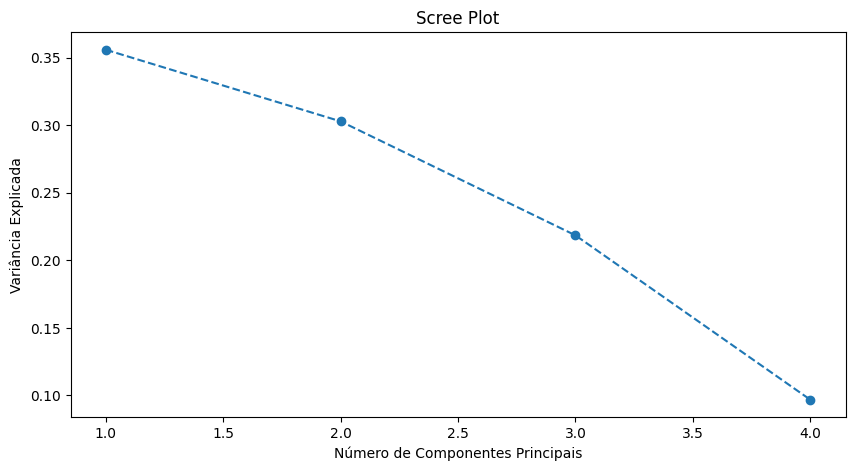

In [5]:
# Variância explicada acumulada
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Scree Plot')
plt.show()

In [6]:
# Atualizando o PCA para 3 componentes
n_pca = 3
pca = PCA(n_components=n_pca)
D_pca = pca.fit_transform(D)
D_pca

array([[-0.10492894, -0.1091033 ,  0.03139943],
       [-0.13426369, -0.12310149, -0.02915739],
       [-0.15427309, -0.12301749, -0.06506626],
       ...,
       [ 0.0480578 , -0.06613193,  0.33026578],
       [-0.17007554, -0.12164745, -0.09262254],
       [-0.10450952, -0.10912433,  0.03203997]])

In [ ]:
# Calculando a matriz de covariância para studo dos autovalores e autovetores das 3 componentes escolhidas (apenas para estudo da matriz)
# Dcov = np.cov(D)
# eigvalues, eigvectors = np.linalg.eig(Dcov)
# order = np.argsort(eigvalues)[::-1]
# orded_eigvalues = eigvalues[order][: 3]
# orded_eigvectors = eigvectors[:, order][: 3]

# print(Dcov)
# print(orded_eigvalues)
# print(orded_eigvectors)

[[0.07668208 0.05094791 0.07564179 ... 0.07938956 0.10073236 0.07623507]
 [0.05094791 0.03391151 0.05008978 ... 0.05324646 0.06655654 0.05063622]
 [0.07564179 0.05008978 0.07637004 ... 0.07295024 0.10284622 0.07525225]
 ...
 [0.07938956 0.05324646 0.07295024 ... 0.09861145 0.09364473 0.07878988]
 [0.10073236 0.06655654 0.10284622 ... 0.09364473 0.13927318 0.10024493]
 [0.07623507 0.05063622 0.07525225 ... 0.07878988 0.10024493 0.07580934]]
[493.65358736+0.j  96.79214714+0.j  66.68879468+0.j]
[[-1.22260700e-02+0.j          3.00975864e-03+0.j
   3.91862819e-03+0.j         ... -5.16097495e-07-0.00164481j
  -9.33534159e-04+0.j          2.12339079e-03+0.j        ]
 [-8.18409398e-03+0.j          1.37000326e-03+0.j
   2.41847065e-03+0.j         ...  7.56233520e-03+0.00502507j
  -2.61267087e-03+0.j         -2.98421398e-04+0.j        ]
 [-1.19847552e-02+0.j          4.13969960e-03+0.j
   6.65533271e-04+0.j         ... -5.60362044e-04+0.00353385j
  -1.93286771e-03+0.j          2.79381293e-03+0.j

In [8]:
# Examinando a variância explicada
ratio = sum(pca.explained_variance_ratio_)

print('Variância explicada por componente: ', pca.explained_variance_ratio_)
print('Variância total das 3 componentes: ', ratio)

Variância explicada por componente:  [0.35592338 0.30289994 0.21851601]
Variância total das 3 componentes:  0.8773393292654303


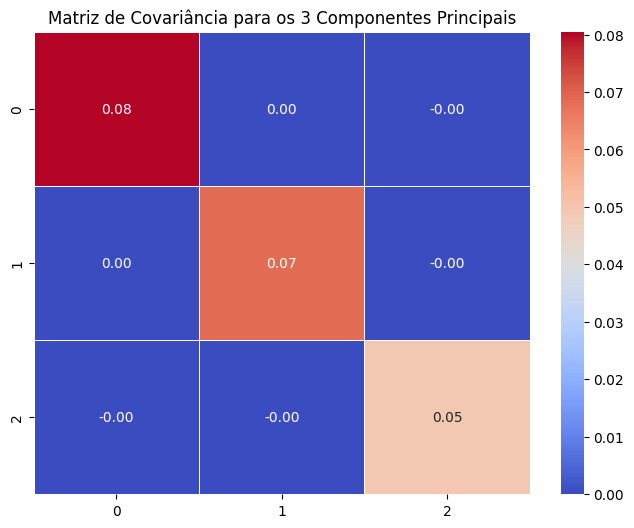

In [9]:
# Calculando a matriz de covariância dos componentes principais
cov_matrix_pc = np.cov(D_pca.T)  # Transpondo para que cada linha seja um componente principal

# Heatmap da matriz de covariância
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix_pc, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title(f'Matriz de Covariância para os {n_pca} Componentes Principais')
plt.show()

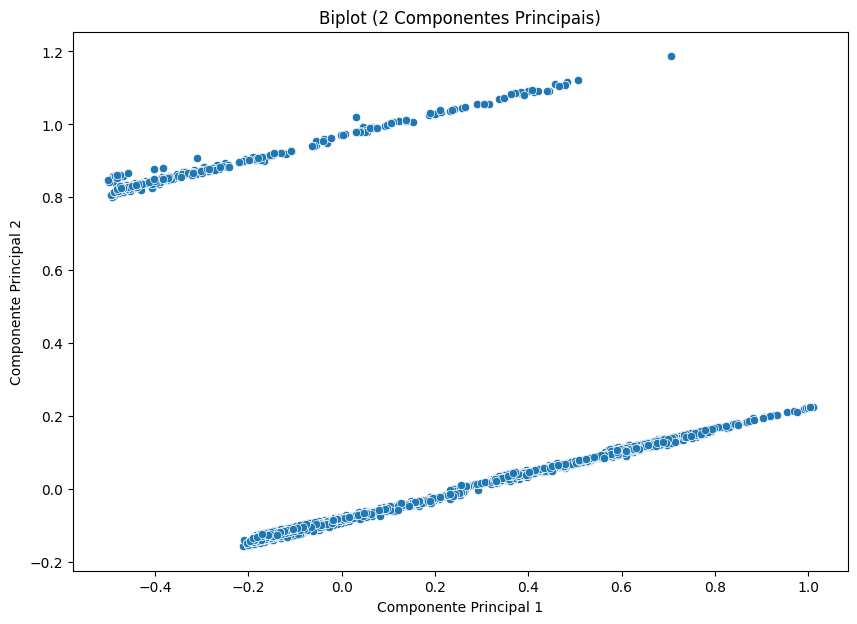

In [ ]:
# Transformação dos dados para 2 componentes
D_pca_2d = pca.transform(D)[:, :2]

# Biplot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=D_pca_2d[:, 0], y=D_pca_2d[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Biplot (2 Componentes Principais)')
plt.show()


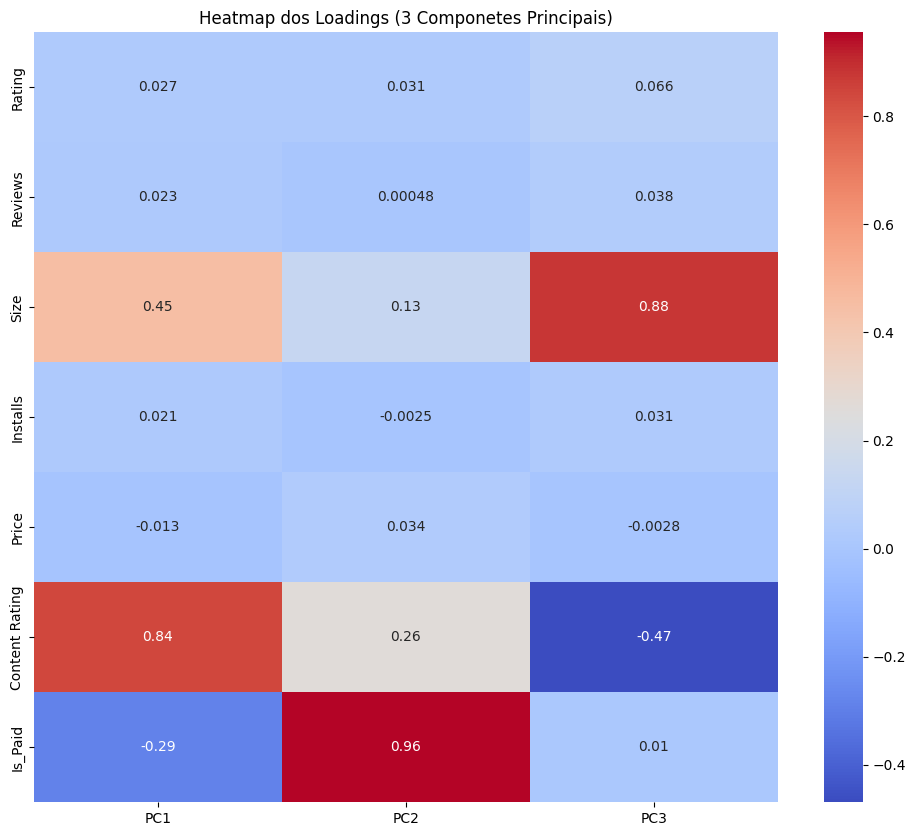

In [11]:
# Matriz de Loadings (Ajustando a definição das colunas)
loadings = pd.DataFrame(pca.components_.T, 
                        index=df.columns,
                        columns=[f'PC{i+1}' for i in range(n_pca)])
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(loadings.iloc[:, :10], cmap='coolwarm', annot=True)
plt.title('Heatmap dos Loadings (3 Componetes Principais)')
plt.show()